In [9]:
from __future__ import division
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math, sys, glob, re
import scipy.constants as phco
from aces_statistics import *

%matplotlib inline

""" geocentric gravitational constant (m^3/s^2) """
GM = 3.986004418e14
""" Earth radius (m) """
Rearth = 6378000
""" Earth rotation (rad/s) """
wE = 7.292e-5

current_path = !pwd

In [50]:
""" This part of the code runs for several minutes, producing differences between theory and experiment for 
    all provided data. TODO: implement backup of the file before running, if previous version contained 
    significant amount of data. """

directories = glob.glob(current_path[0] + '/v4.3.2_mb_53896_53907/gs999/*')

dataset_number = 0
carrier_code = "ca"
frequency_n = "1"

data1 = collect_data(dataset_number, carrier_code, frequency_n)
gs_orbit, iss_orbit = collect_trajectories(dataset_number)

data1["gs_positions"] = map(lambda x: position_by_time(gs_orbit, x), data1['coord.time'])
data1["gs_velocities"] = map(lambda x: velocity_by_time(gs_orbit, x), data1['coord.time'])
data1["iss_positions"] = map(lambda x: position_by_time(iss_orbit, x), data1['coord.time'])
data1["iss_velocities"] = map(lambda x: velocity_by_time(iss_orbit, x), data1['coord.time'])

data1 = relativistic_effect(data1, frequency_n)
    
mean_difference = np.mean(data1['difference'])
standard_deviation = np.std(data1['difference'])

print mean_difference, ' +/- ', standard_deviation

7.38070796749e-15  +/-  1.93979724248e-13


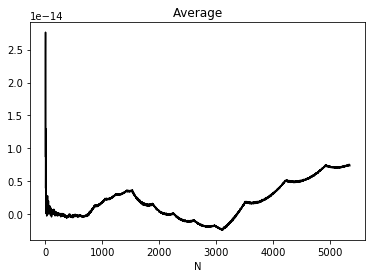

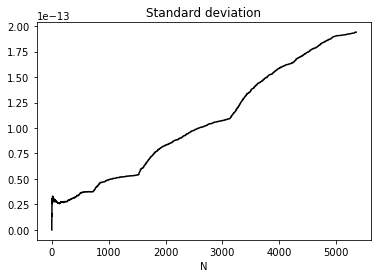

TEST
7.380707967487222e-15  +/-  1.9397972424813924e-13
7.380707967487216e-15  +/-  1.9397972424813916e-13
36


In [59]:
data_list = np.array(data1['difference'])

averages = [data_list[0]]
variances = [0]

for N in range(1, len(data_list)):
    XN = averages[-1]
    SigmaN = variances[-1]

    averages.append( (XN*N + data_list[N])/(N+1) )
    variances.append( ((SigmaN + XN**2)*N + data_list[N]**2)/(N+1) - averages[-1]**2 )

    
fig, ax = plt.subplots()
plt.plot(averages, c = 'k')
plt.xlabel('N')
plt.title('Average')
plt.show()

fig, ax = plt.subplots()
plt.plot(np.sqrt(variances), c = 'k')
plt.xlabel('N')
plt.title('Standard deviation')
plt.show()

print "TEST"
print np.mean(data_list), ' +/- ', np.std(data_list)
print averages[-1], ' +/- ', np.sqrt(variances[-1])
print np.argmin(variances[100:])